# Cohort Analysis
Cohort Analysis is one of the most powerful and demanded techniques available to marketers for assessing long-term trends in customer retention and calculating life-time value.

Custora says: “The distinctive “layer-cake graph” produced by looking at cohorts in calendar time can provide powerful insights into the health of your business. **At a given point in time, what percentage of your revenue or profit came from new vs. repeat customers?**

Tracking how that ratio has changed over time can give you insight into whether you’re fueling top-line growth solely through new customer acquisition – or whether you’re continuing to nurture those relationships with your existing customers over time.”

Usually, we focus on calculating life-time value or comparing cohorts, but I was really impressed with this useful analytical approach and tried to do the same chart in R. Now, we can see what I’ve got.

After we processed a great deal of data it should be on the following structure. There are Cohort01, Cohort02, etc. – cohort’s name due to customer signup date or first purchase date and M1, M2, etc. – period of cohort’s life-time (first month, second month, etc.):

For example, Cohort-1 signed up in January (M1) and brought us \$270,000 during the first month (M1). Cohort-5 signed up in May (M5) and brought us $31,000 in September (M9).

Ok. Suppose you’ve done data process and got cohort.sum data frame as a result and it looks like the table above. You can reproduce this data frame with the following code:

In [1]:
cohort.sum <- data.frame(cohort=c('Cohort01', 'Cohort02', 'Cohort03', 'Cohort04', 'Cohort05', 'Cohort06', 'Cohort07', 'Cohort08', 'Cohort09', 'Cohort10', 'Cohort11', 'Cohort12'),
 M1=c(270000,0,0,0,0,0,0,0,0,0,0,0),
 M2=c(85000,275000,0,0,0,0,0,0,0,0,0,0),
 M3=c(72000,63000,277000,0,0,0,0,0,0,0,0,0),
 M4=c(52000,42000,76000,361000,0,0,0,0,0,0,0,0),
 M5=c(50000,45000,60000,80000,288000,0,0,0,0,0,0,0),
 M6=c(51000,52000,55000,51000,58000,253000,0,0,0,0,0,0),
 M7=c(51000,69000,48000,45000,42000,54000,272000,0,0,0,0,0),
 M8=c(46000,85000,77000,41000,38000,37000,74000,352000,0,0,0,0),
 M9=c(38000,42000,72000,41000,31000,30000,49000,107000,285000,0,0,0),
 M10=c(39000,38000,45000,33000,34000,34000,46000,83000,69000,279000,0,0),
 M11=c(38000,42000,31000,32000,26000,28000,43000,82000,51000,87000,282000,0),
 M12=c(35000,35000,38000,45000,35000,32000,48000,44000,47000,52000,92000,500000))

In [2]:
cohort.sum

,cohort,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
1,Cohort01,270000,85000,72000,52000,50000,51000,51000,46000,38000,39000,38000,35000
2,Cohort02,0,275000,63000,42000,45000,52000,69000,85000,42000,38000,42000,35000
3,Cohort03,0,0,277000,76000,60000,55000,48000,77000,72000,45000,31000,38000
4,Cohort04,0,0,0,361000,80000,51000,45000,41000,41000,33000,32000,45000
5,Cohort05,0,0,0,0,288000,58000,42000,38000,31000,34000,26000,35000
6,Cohort06,0,0,0,0,0,253000,54000,37000,30000,34000,28000,32000
7,Cohort07,0,0,0,0,0,0,272000,74000,49000,46000,43000,48000
8,Cohort08,0,0,0,0,0,0,0,352000,107000,83000,82000,44000
9,Cohort09,0,0,0,0,0,0,0,0,285000,69000,51000,47000
10,Cohort10,0,0,0,0,0,0,0,0,0,279000,87000,52000


In [4]:
#connect necessary libraries
library(ggplot2)
library(reshape2)
#we need to melt data
cohort.chart <- melt(cohort.sum, id.vars = "cohort")
# cohort.chart

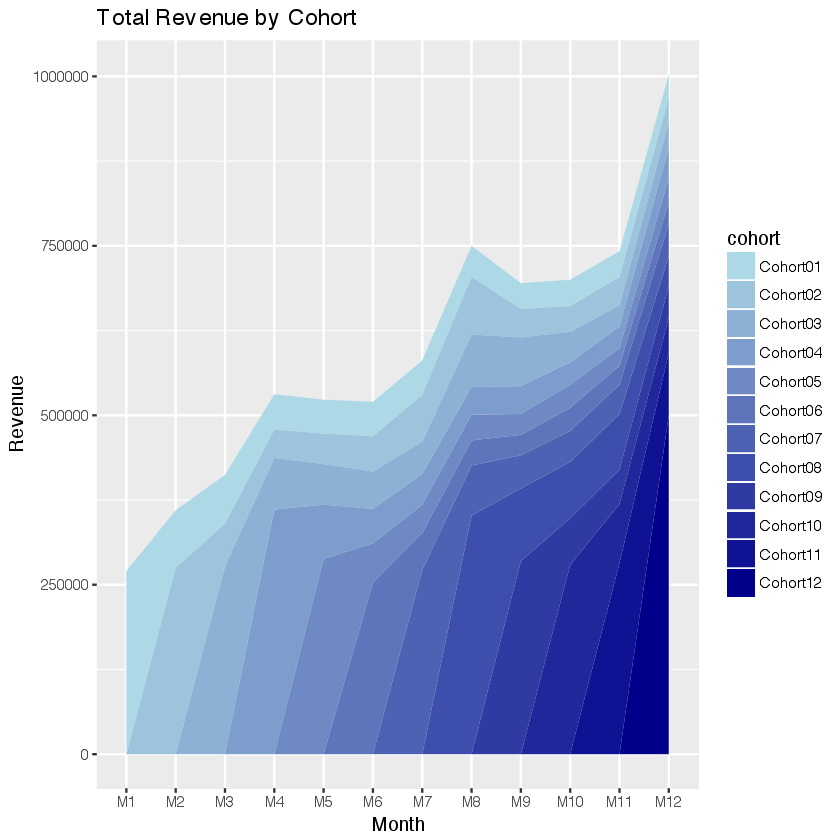

In [7]:
colnames(cohort.chart) <- c('cohort', 'month', 'revenue')

#define palette
blues <- colorRampPalette(c('lightblue', 'darkblue'))

#plot data
p <- ggplot(cohort.chart, aes(x=month, y=revenue, group=cohort))
p + geom_area(aes(fill = cohort)) +
 scale_fill_manual(values = blues(nrow(cohort.sum))) +
 ggtitle('Total Revenue by Cohort') + ylab("Revenue") + xlab("Month")

You can see that monthly revenue is highly dependent on new customers who do their first purchases. But during the time company accumulates several layers of incomes from existing (loyal) customers and reduced dependence. Further, it seems like there was some activity (e.g. promo) in the eighth month (M8) and a few cohorts responded. Really helpful chart.

Continue to exploit a great idea of ‘layer-cake’ graph.

If you liked the approach I shared in the previous topic, perhaps, you would have one or two questions we should answer additionally. Recall “Total revenue by Cohort” chart:

As total revenue depends on the number of customers we attracted and on the amount of money each of them spent with us, there is a sense to dig deeper.

The number of active customers can be visualized with the algorithm we used for total revenue. After we processed a large amount of data it should be in the following structure. There are Cohort01, Cohort02, etc. – cohort’s name due to customer signup date or first purchase date and M1, M2, etc. – a period of cohort’s life-time (first month, second month, etc.):

For example, Cohort-1 signed up in January (M1) and included 11,000 clients who made purchases during the first month (M1). Cohort-5 signed up in May (M5) and there were 1,100 active clients in September (M9).

Ok. Suppose you’ve done data process and got cohort.clients data frame as a result and it looks like the table above. You can reproduce this data frame with the following code:

In [8]:
cohort.clients <- data.frame(cohort=c('Cohort01', 'Cohort02', 'Cohort03', 'Cohort04', 'Cohort05', 'Cohort06', 'Cohort07', 'Cohort08', 'Cohort09', 'Cohort10', 'Cohort11', 'Cohort12'),
 M1=c(11000,0,0,0,0,0,0,0,0,0,0,0),
 M2=c(1900,10000,0,0,0,0,0,0,0,0,0,0),
 M3=c(1400,2000,11500,0,0,0,0,0,0,0,0,0),
 M4=c(1100,1300,2400,13200,0,0,0,0,0,0,0,0),
 M5=c(1000,1100,1400,2400,11100,0,0,0,0,0,0,0),
 M6=c(900,900,1200,1600,1900,10300,0,0,0,0,0,0),
 M7=c(850,900,1100,1300,1300,1900,13000,0,0,0,0,0),
 M8=c(850,850,1000,1200,1100,1300,1900,11500,0,0,0,0),
 M9=c(800,800,950,1100,1100,1250,1000,1200,11000,0,0,0),
 M10=c(800,780,900,1050,1050,1200,900,1200,1900,13200,0,0),
 M11=c(750,750,900,1000,1000,1180,800,1100,1150,2000,11300,0),
 M12=c(740,700,870,1000,900,1100,700,1050,1025,1300,1800,20000))

cohort.clients

,cohort,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
1,Cohort01,11000,1900,1400,1100,1000,900,850,850,800,800,750,740
2,Cohort02,0,10000,2000,1300,1100,900,900,850,800,780,750,700
3,Cohort03,0,0,11500,2400,1400,1200,1100,1000,950,900,900,870
4,Cohort04,0,0,0,13200,2400,1600,1300,1200,1100,1050,1000,1000
5,Cohort05,0,0,0,0,11100,1900,1300,1100,1100,1050,1000,900
6,Cohort06,0,0,0,0,0,10300,1900,1300,1250,1200,1180,1100
7,Cohort07,0,0,0,0,0,0,13000,1900,1000,900,800,700
8,Cohort08,0,0,0,0,0,0,0,11500,1200,1200,1100,1050
9,Cohort09,0,0,0,0,0,0,0,0,11000,1900,1150,1025
10,Cohort10,0,0,0,0,0,0,0,0,0,13200,2000,1300


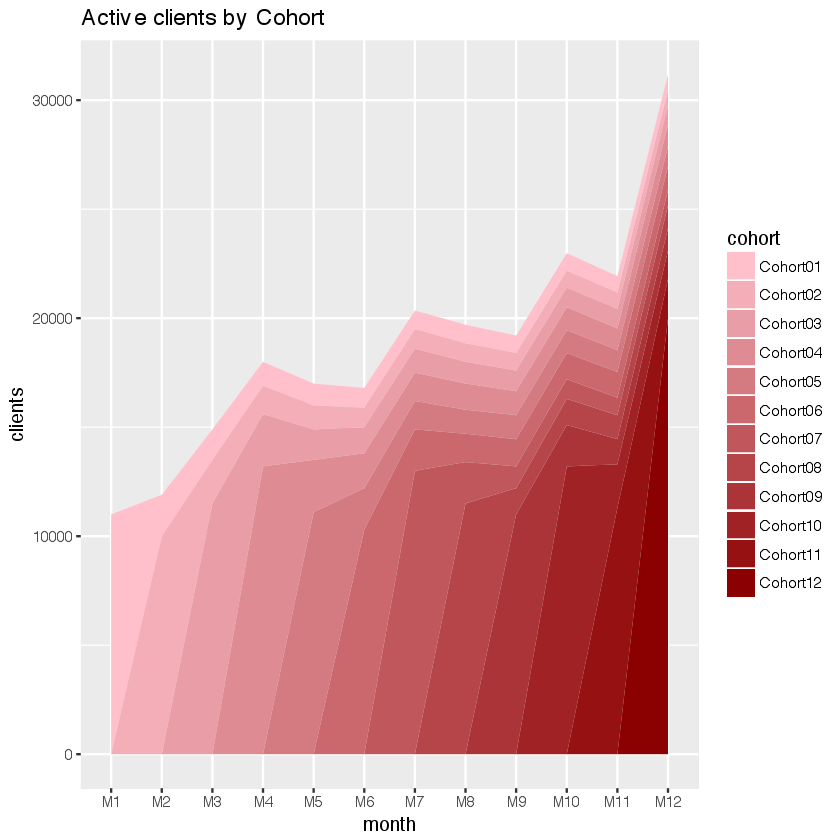

In [9]:
# Let’s create the “layer-cake” chart with the following R code:

#connect necessary libraries
library(ggplot2)
library(reshape2)
#we need to melt data
cohort.chart.cl <- melt(cohort.clients, id.vars = 'cohort')
colnames(cohort.chart.cl) <- c('cohort', 'month', 'clients')

#define palette
reds <- colorRampPalette(c('pink', 'dark red'))

#plot data
p <- ggplot(cohort.chart.cl, aes(x=month, y=clients, group=cohort))
p + geom_area(aes(fill = cohort)) +
 scale_fill_manual(values = reds(nrow(cohort.clients))) +
 ggtitle('Active clients by Cohort')

It seems like a lot of customers purchased once and gone. It can be a reason why total revenue is mainly provided by new customers.

And finally, we can calculate and visualize the average revenue per client. The R code can be as the following:

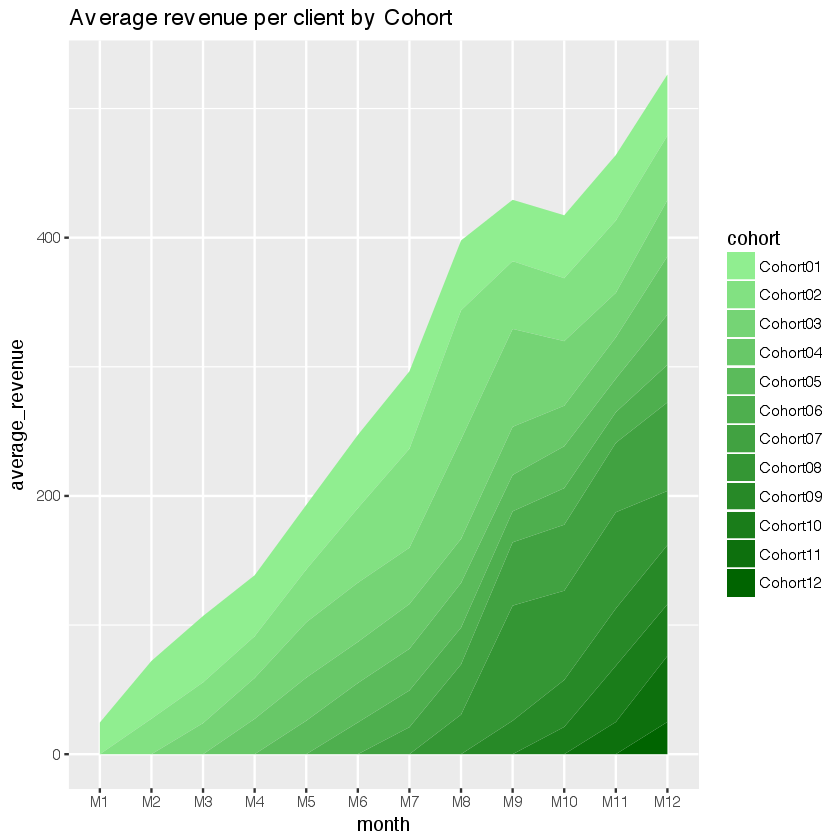

In [10]:
#we need to divide the data frames (excluding cohort name)
rev.per.client <- cohort.sum[,c(2:13)]/cohort.clients[,c(2:13)]
rev.per.client[is.na(rev.per.client)] <- 0
rev.per.client <- cbind(cohort.sum[,1], rev.per.client)

#define palette
greens <- colorRampPalette(c('light green', 'dark green'))

#melt and plot data
cohort.chart.per.cl <- melt(rev.per.client, id.vars = 'cohort.sum[, 1]')
colnames(cohort.chart.per.cl) <- c('cohort', 'month', 'average_revenue')
p <- ggplot(cohort.chart.per.cl, aes(x=month, y=average_revenue, group=cohort))
p + geom_area(aes(fill = cohort)) +
 scale_fill_manual(values = greens(nrow(cohort.clients))) +
 ggtitle('Average revenue per client by Cohort')

It seems like Cohort02 customers increased their average purchases during M5-M8 months. It can be a sign.

Note: The last chart shows average revenue per customer of each cohort, but it isn’t cumulative value as in previous two charts, it doesn’t show total average revenue for all clients. This chart can be used for comparing cohorts, not for summarizing. Please, don’t be confused.

## Retention

When we spend more money on attracting new customers then they bring us by the first but, usually, by the next purchases, we appeal to customer’s life-time value (CLV).

We expect that customers will spend with us for years and it means we expect to earn some profit finally. In this case, retention is a vital parameter. Most of our customers are fickle and some of them make one purchase only. So, the retention ratio should be controlled and managed as well as possible.

Cohort analysis gives us food for thought. In this case, we will use data we have from the previous post. Just to recall, we have the following number of customers who purchased in a particular month of their life-time:

For testing, you can create this data frame using the code:

In [11]:
cohort.clients <- data.frame(cohort=c('Cohort01','Cohort02',
'Cohort03','Cohort04','Cohort05','Cohort06','Cohort07',
 'Cohort08','Cohort09','Cohort10','Cohort11','Cohort12'),
 M01=c(11000,0,0,0,0,0,0,0,0,0,0,0),
 M02=c(1900,10000,0,0,0,0,0,0,0,0,0,0),
 M03=c(1400,2000,11500,0,0,0,0,0,0,0,0,0),
 M04=c(1100,1300,2400,13200,0,0,0,0,0,0,0,0),
 M05=c(1000,1100,1400,2400,11100,0,0,0,0,0,0,0),
 M06=c(900,900,1200,1600,1900,10300,0,0,0,0,0,0),
 M07=c(850,900,1100,1300,1300,1900,13000,0,0,0,0,0),
 M08=c(850,850,1000,1200,1100,1300,1900,11500,0,0,0,0),
 M09=c(800,800,950,1100,1100,1250,1000,1200,11000,0,0,0),
 M10=c(800,780,900,1050,1050,1200,900,1200,1900,13200,0,0),
 M11=c(750,750,900,1000,1000,1180,800,1100,1150,2000,11300,0),
 M12=c(740,700,870,1000,900,1100,700,1050,1025,1300,1800,20000))

cohort.clients 

,cohort,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
1,Cohort01,11000,1900,1400,1100,1000,900,850,850,800,800,750,740
2,Cohort02,0,10000,2000,1300,1100,900,900,850,800,780,750,700
3,Cohort03,0,0,11500,2400,1400,1200,1100,1000,950,900,900,870
4,Cohort04,0,0,0,13200,2400,1600,1300,1200,1100,1050,1000,1000
5,Cohort05,0,0,0,0,11100,1900,1300,1100,1100,1050,1000,900
6,Cohort06,0,0,0,0,0,10300,1900,1300,1250,1200,1180,1100
7,Cohort07,0,0,0,0,0,0,13000,1900,1000,900,800,700
8,Cohort08,0,0,0,0,0,0,0,11500,1200,1200,1100,1050
9,Cohort09,0,0,0,0,0,0,0,0,11000,1900,1150,1025
10,Cohort10,0,0,0,0,0,0,0,0,0,13200,2000,1300


Firstly, we need to process data to the following view:

That is because we want to compare cohorts’ behavior for the same months of life-time. If months M01, M02, …, M12 mean calendar months as for January, February, …, December in the first table, that they are sequence numbers of life-time month in the second table.

Suppose dataset with customers is in cohort.clients data frame. R code for processing data can be the next:

In [12]:
#connect libraries
library(dplyr)
library(ggplot2)
library(reshape2)

cohort.clients.r <- cohort.clients #create new data frame
totcols <- ncol(cohort.clients.r) #count number of columns in data set
for (i in 1:nrow(cohort.clients.r)) { #for loop for shifting each row
      df <- cohort.clients.r[i,] #select row from data frame
      df <- df[ , !df[]==0] #remove columns with zeros
      partcols <- ncol(df) #count number of columns in row (w/o zeros)
      #fill columns after values by zeros
      if (partcols < totcols) df[, c((partcols+1):totcols)] <- 0
      cohort.clients.r[i,] <- df #replace initial row by new one
}
cohort.clients


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,cohort,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
1,Cohort01,11000,1900,1400,1100,1000,900,850,850,800,800,750,740
2,Cohort02,0,10000,2000,1300,1100,900,900,850,800,780,750,700
3,Cohort03,0,0,11500,2400,1400,1200,1100,1000,950,900,900,870
4,Cohort04,0,0,0,13200,2400,1600,1300,1200,1100,1050,1000,1000
5,Cohort05,0,0,0,0,11100,1900,1300,1100,1100,1050,1000,900
6,Cohort06,0,0,0,0,0,10300,1900,1300,1250,1200,1180,1100
7,Cohort07,0,0,0,0,0,0,13000,1900,1000,900,800,700
8,Cohort08,0,0,0,0,0,0,0,11500,1200,1200,1100,1050
9,Cohort09,0,0,0,0,0,0,0,0,11000,1900,1150,1025
10,Cohort10,0,0,0,0,0,0,0,0,0,13200,2000,1300


Furthermore, we should calculate retention ratio. I use the formula:

Retention ratio = # clients in particular month / # clients in 1st month of life-time

Here are two alternative codes in R you can use:

In [13]:
#calculate retention (1)
x <- cohort.clients.r[,c(2:13)]
y <- cohort.clients.r[,2]
reten.r <- apply(x, 2, function(x) x/y )
reten.r <- data.frame(cohort=(cohort.clients.r$cohort), reten.r)

or:

In [14]:
#calculate retention (2)
c <- ncol(cohort.clients.r)
reten.r <- cohort.clients.r
for (i in 2:c) {
     reten.r[, (c+i-1)] <- reten.r[, i] / reten.r[, 2]
}
reten.r <- reten.r[,-c(2:c)]
colnames(reten.r) <- colnames(cohort.clients.r)

In [15]:
reten.r

,cohort,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
1,Cohort01,1,0.172727272727273,0.127272727272727,0.1,0.0909090909090909,0.0818181818181818,0.0772727272727273,0.0772727272727273,0.0727272727272727,0.0727272727272727,0.0681818181818182,0.0672727272727273
2,Cohort02,1,0.2,0.13,0.11,0.09,0.09,0.085,0.08,0.078,0.075,0.07,0
3,Cohort03,1,0.208695652173913,0.121739130434783,0.104347826086957,0.0956521739130435,0.0869565217391304,0.0826086956521739,0.0782608695652174,0.0782608695652174,0.0756521739130435,0,0
4,Cohort04,1,0.181818181818182,0.121212121212121,0.0984848484848485,0.0909090909090909,0.0833333333333333,0.0795454545454545,0.0757575757575758,0.0757575757575758,0,0,0
5,Cohort05,1,0.171171171171171,0.117117117117117,0.0990990990990991,0.0990990990990991,0.0945945945945946,0.0900900900900901,0.0810810810810811,0,0,0,0
6,Cohort06,1,0.184466019417476,0.12621359223301,0.121359223300971,0.116504854368932,0.114563106796117,0.106796116504854,0,0,0,0,0
7,Cohort07,1,0.146153846153846,0.0769230769230769,0.0692307692307692,0.0615384615384615,0.0538461538461538,0,0,0,0,0,0
8,Cohort08,1,0.104347826086957,0.104347826086957,0.0956521739130435,0.091304347826087,0,0,0,0,0,0,0
9,Cohort09,1,0.172727272727273,0.104545454545455,0.0931818181818182,0,0,0,0,0,0,0,0
10,Cohort10,1,0.151515151515152,0.0984848484848485,0,0,0,0,0,0,0,0,0


And finally I propose to create 3 useful charts for visualizing retention ratio.

**1:** Cohort retention ratio dynamics:

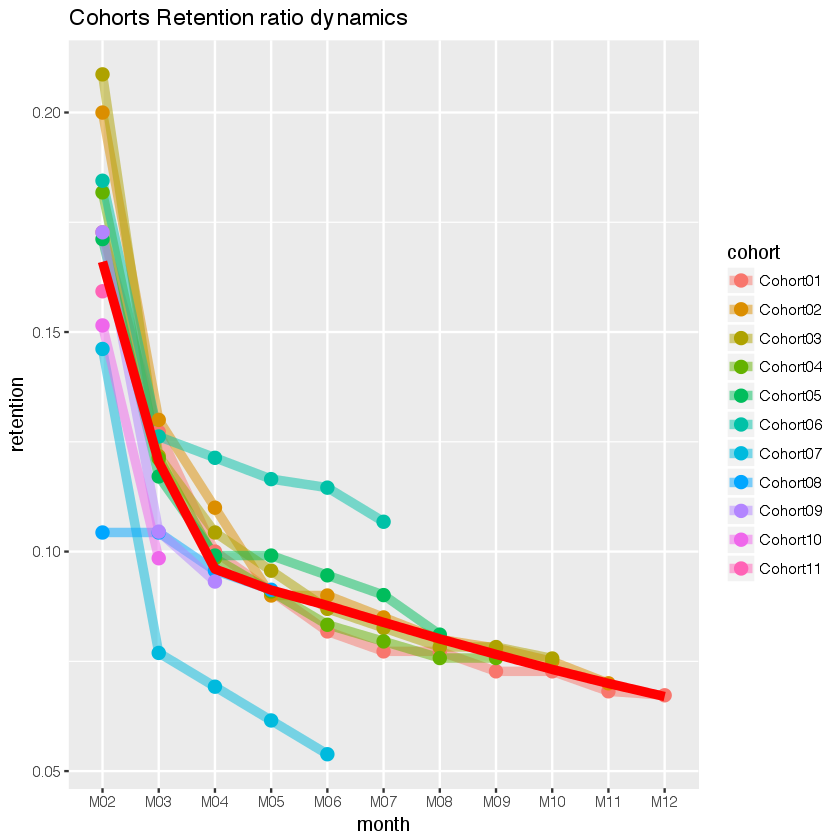

In [17]:
#charts
reten.r <- reten.r[,-2] #remove M01 data because it is always 100%
#dynamics analysis chart
cohort.chart1 <- melt(reten.r, id.vars = 'cohort')
colnames(cohort.chart1) <- c('cohort', 'month', 'retention')
cohort.chart1 <- filter(cohort.chart1, retention != 0)
p <- ggplot(cohort.chart1, aes(x=month, y=retention, group=cohort, colour=cohort))
p + geom_line(size=2, alpha=1/2) +
    geom_point(size=3, alpha=1) +
    geom_smooth(aes(group=1), method = 'loess', size=2, colour='red', se=FALSE) +
    labs(title="Cohorts Retention ratio dynamics")

Note: I’ve removed the first (M01) month from charts because it is always equal 1.0 (100%). The red line on the plot is the average ratio. It is easy to identify cohorts which are above and below. So, the first thought that I have is to compare them and find reasons for such difference. For example, look at Cohort07 and Cohort06:

**2:** Chart for analyzing how many customers stick around for the second month:

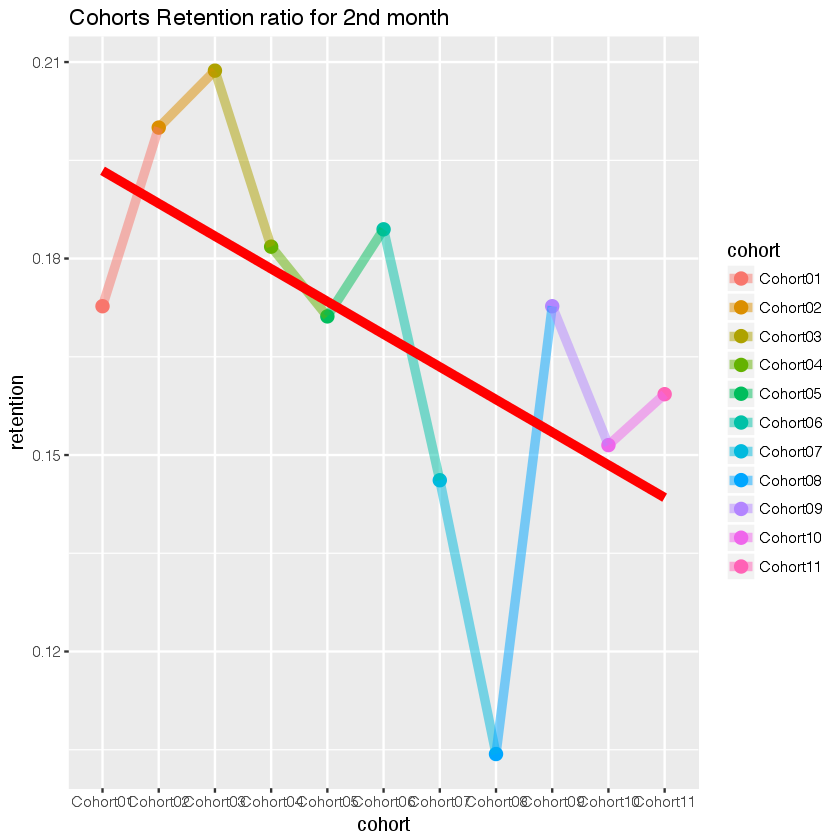

In [18]:
#second month analysis chart
cohort.chart2 <- filter(cohort.chart1, month=='M02') #choose any month instead of M02
p <- ggplot(cohort.chart2, aes(x=cohort, y=retention, colour=cohort))
p + geom_point(size=3) +
    geom_line(aes(group=1), size=2, alpha=1/2) +
    geom_smooth(aes(group=1), size=2, colour='red', method = 'lm', se=FALSE) +
    labs(title="Cohorts Retention ratio for 2nd month")

Our retention ratio decreased from 1.0 (100%) in the first month to 0.1-0.21 (10-21%) in the second month, this is the biggest drop in our example. That is why it is important to see how our dynamic changes (and its trend) from one cohort to another for the second month only. Also, this chart shows month to month dynamic because the second month for Cohort01 is February, for Cohort02 – March, etc. We see a negative trend (red line) and we should find insights. Also, you can choose any other month you want (follow the notes in the code).

**3:** And for the dessert – here is my favorite one – Cycle plot:

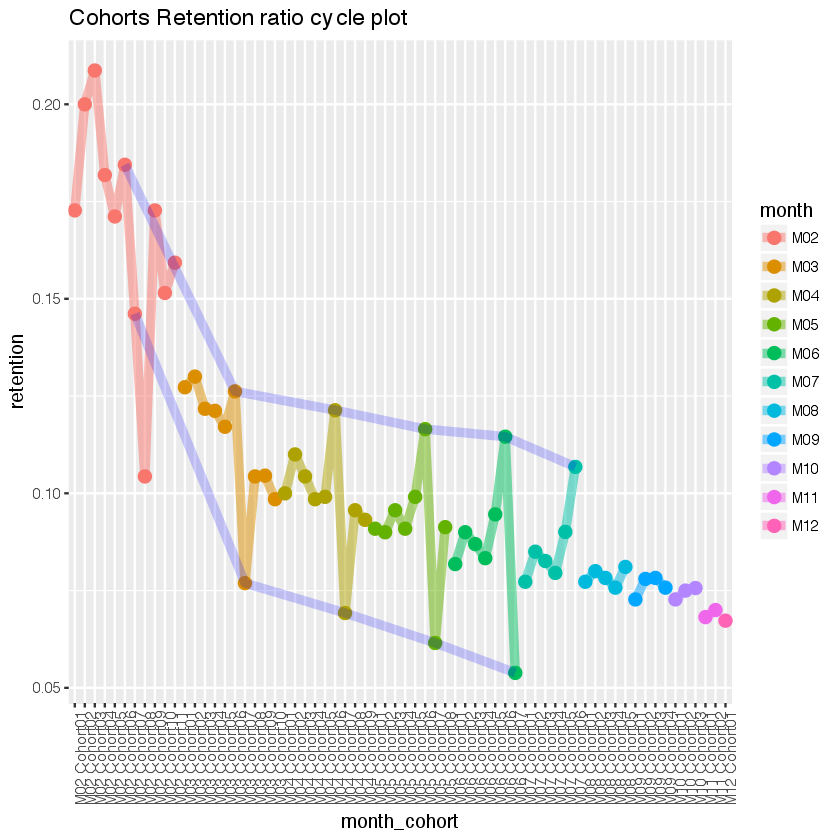

In [19]:
#cycle plot
cohort.chart3 <- cohort.chart1
cohort.chart3 <- mutate(cohort.chart3, month_cohort = paste(month, cohort))
p <- ggplot(cohort.chart3, aes(x=month_cohort, y=retention, group=month, colour=month))
#choose any cohorts instead of Cohort07 and Cohort06
m1 <- filter(cohort.chart3, cohort=='Cohort07')
m2 <- filter(cohort.chart3, cohort=='Cohort06')
p + geom_point(size=3) +
  geom_line(aes(group=month), size=2, alpha=1/2) +
  labs(title="Cohorts Retention ratio cycle plot") +
  geom_line(data=m1, aes(group=1), colour='blue', size=2, alpha=1/5) +
  geom_line(data=m2, aes(group=1), colour='blue', size=2, alpha=1/5) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

This plot is a mix of the first and the second charts. It presents the sequence of the 2nd chart for each month and gives us an interesting view. The first (red) curve is retention of the 2nd month (M02) of cohorts from 01 to 11 (it is the same with 2nd chart), the second (yellow) curve is retention of 3rd month (M03) of cohorts from 01 to 10, etc. Here we can see a total trend from month to month as well, as cohorts’ comparison within each month. Furthermore, I’ve added two blue lines for cohort07 and cohort06 to show the difference between them (you can choose any other cohorts – follow the notes in the code). So, we can see cycles of each cohort in each month.